# Init

In [44]:
!pip install nltk
!python -m nltk.downloader stopwords

!pip install spacy
!python -m spacy download en_core_web_lg

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/587.7 MB 5.3 MB/s eta 0:01:29^C
     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/587.7 MB 5.3 MB/s eta 0:01:29
ERROR: Operation cancelled by user

Aborted.


In [1]:
import pandas as pd
import string
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('anthems.csv')

In [3]:
df = df_raw[['Anthem']]

# Pre Process

In [4]:
df.drop_duplicates(inplace=True)
df['Anthem'] = df['Anthem'].str.lower()
df.head()

/tmp/ipykernel_9000/1720008614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)
/tmp/ipykernel_9000/1720008614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anthem'] = df['Anthem'].str.lower()


,Anthem
0,"around our flag we stand united, with one wish..."
1,"our fatherland, free, independent, that has fo..."
2,"land of mountains, land by the river, land of ..."
3,"azerbaijan, azerbaijan! the glorious fatherlan..."
4,"we, belarusians, are peaceful people, wholehea..."


In [5]:
df['Anthem'] = df['Anthem'].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
df.head()

/tmp/ipykernel_9000/1345140091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anthem'] = df['Anthem'].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))


,Anthem
0,around our flag we stand united with one wish...
1,our fatherland free independent that has fo...
2,land of mountains land by the river land of ...
3,azerbaijan azerbaijan the glorious fatherlan...
4,we belarusians are peaceful people wholehea...


In [6]:
df['Anthem'] = df['Anthem'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))
df.head()

/tmp/ipykernel_9000/3879813486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anthem'] = df['Anthem'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))


,Anthem
0,around our flag we stand united with one wish ...
1,our fatherland free independent that has for c...
2,land of mountains land by the river land of fi...
3,azerbaijan azerbaijan the glorious fatherland ...
4,we belarusians are peaceful people wholehearte...


In [7]:
nlp = spacy.load('en_core_web_lg')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Anthem'] = df['Anthem'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word not in nlp.Defaults.stop_words]))
df.head()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_9000/952847678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anthem'] = df['Anthem'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word not in nlp.Defaults.stop_words]))


,Anthem
0,flag stand united wish goal sacred oath bestow...
1,fatherland free independent centuries lived su...
2,land mountains land river land fields land cat...
3,azerbaijan azerbaijan glorious fatherland valo...
4,belarusians peaceful people wholeheartedly dev...


In [8]:
df.reset_index(drop=True, inplace=True)
df.head()

,Anthem
0,flag stand united wish goal sacred oath bestow...
1,fatherland free independent centuries lived su...
2,land mountains land river land fields land cat...
3,azerbaijan azerbaijan glorious fatherland valo...
4,belarusians peaceful people wholeheartedly dev...


In [9]:
vectorizer = TfidfVectorizer(strip_accents='ascii', min_df=10, max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Anthem'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# KMeans

In [10]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5, random_state=42)

In [18]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(tfidf_matrix.toarray()), columns=['pca_1', 'pca_2'])

In [19]:
reduced_data['cluster'] = kmeans.labels_
reduced_data['Country'] = df_raw['Country']

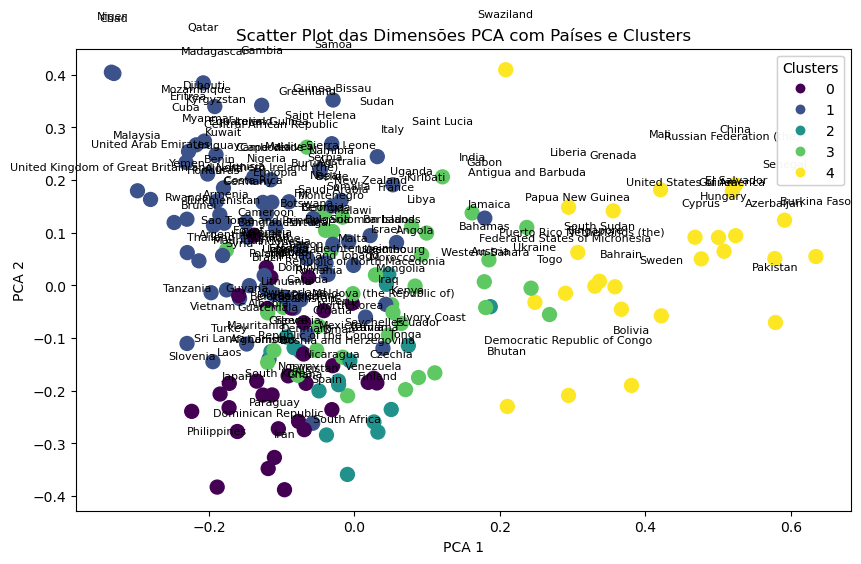

In [24]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(reduced_data['pca_1'], reduced_data['pca_2'], c=reduced_data['cluster'], cmap='viridis', s=100)

for i in range(reduced_data.shape[0]):
    plt.text(reduced_data['pca_1'][i], reduced_data['pca_2'][i] + 0.1, reduced_data['Country'][i], fontsize=8, ha='center')

plt.title('Scatter Plot das Dimensões PCA com Países e Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()